In [1]:
import pandas as pd
import numpy as np
import copy
from Codebase import Valuestandard
from collections import Counter

In [2]:
training_data = pd.read_csv("[1]DATA/[2]Training_and_Testing_Set/training.csv")
testing_data = pd.read_csv("[1]DATA/[2]Training_and_Testing_Set/testing.csv")

training_data.info()
print(' ')
print('=========================================== ')
print(' ')
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  928 non-null    int64  
 1   Number                      928 non-null    int64  
 2   Age                         928 non-null    int64  
 3   Gender                      928 non-null    int64  
 4   Height                      928 non-null    int64  
 5   Weight                      928 non-null    int64  
 6   BMI                         928 non-null    float64
 7   Hypertesion                 928 non-null    int64  
 8   Diabetes                    928 non-null    int64  
 9   CI                          928 non-null    int64  
 10  CHD                         928 non-null    int64  
 11  Asthma                      928 non-null    int64  
 12  Hypothyroidism              928 non-null    int64  
 13  COPD                        928 non

In [4]:
# 拆分标签

"""术中低氧"""
# 术前变量
x_train_1 = copy.deepcopy(training_data[["BMI","Snore","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","Mallampati_Class","BaselineSpO2"]])
y_train_1 = copy.deepcopy(training_data["Label_Intraoperative"])
x_test_1 = copy.deepcopy(testing_data[["BMI","Snore","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","Mallampati_Class","BaselineSpO2"]])
y_test_1 = copy.deepcopy(testing_data["Label_Intraoperative"])

# 术前+术中变量
x_train_2 = copy.deepcopy(training_data[["Age","BMI","Neck_Circumference","ASA_scores","TMD","TMH","SMD","Mallampati_Class","BaselineSpO2","GIT","Operating_Time","Induction_propofol_dose","Total_propofol_dose"]])
y_train_2 = copy.deepcopy(training_data["Label_Intraoperative"])
x_test_2 = copy.deepcopy(testing_data[["Age","BMI","Neck_Circumference","ASA_scores","TMD","TMH","SMD","Mallampati_Class","BaselineSpO2","GIT","Operating_Time","Induction_propofol_dose","Total_propofol_dose"]])
y_test_2 = copy.deepcopy(testing_data["Label_Intraoperative"])

"""诱导低氧"""
# 术前变量
x_train_3 = copy.deepcopy(training_data[["BMI","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","RHSMD","Mallampati_Class","BaselineSpO2"]])
y_train_3 = copy.deepcopy(training_data["Label_Induction"])
x_test_3 = copy.deepcopy(testing_data[["BMI","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","RHSMD","Mallampati_Class","BaselineSpO2"]])
y_test_3 = copy.deepcopy(testing_data["Label_Induction"])

# 术前+诱导变量
x_train_4 = copy.deepcopy(training_data[["Age","BMI","Neck_Circumference","TMD","TMH","SMD","RHSMD","Mallampati_Class","BaselineSpO2","Induction_propofol_dose"]])
y_train_4 = copy.deepcopy(training_data["Label_Induction"])
x_test_4 = copy.deepcopy(testing_data[["Age","BMI","Neck_Circumference","TMD","TMH","SMD","RHSMD","Mallampati_Class","BaselineSpO2","Induction_propofol_dose"]])
y_test_4 = copy.deepcopy(testing_data["Label_Induction"])

In [5]:
print(x_train_1.shape)
print(y_train_1.shape)
x_train_1.info()
print(" ")
print(" ")
print(x_test_1.shape)
print(y_test_1.shape)
x_test_1.info()
print("=================================================")
print(x_train_2.shape)
print(y_train_2.shape)
x_train_2.info()
print(" ")
print(" ")
print(x_test_2.shape)
print(y_test_2.shape)
x_test_2.info()
print("=================================================")
print(x_train_3.shape)
print(y_train_3.shape)
x_train_3.info()
print(" ")
print(" ")
print(x_test_3.shape)
print(y_test_3.shape)
x_test_3.info()
print("=================================================")
print(x_train_4.shape)
print(y_train_4.shape)
x_train_4.info()
print(" ")
print(" ")
print(x_test_4.shape)
print(y_test_4.shape)
x_test_4.info()

(928, 9)
(928,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 928 non-null    float64
 1   Snore               928 non-null    int64  
 2   Neck_Circumference  928 non-null    int64  
 3   ASA_scores          928 non-null    int64  
 4   TMD                 928 non-null    float64
 5   RHTMD               928 non-null    float64
 6   TMH                 928 non-null    float64
 7   Mallampati_Class    928 non-null    int64  
 8   BaselineSpO2        928 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 65.4 KB
 
 
(232, 9)
(232,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 232 non-null    float64
 1   Snore         

In [6]:
# 权重
"""术中低氧"""
print("Postive Sample：%s" % Counter(y_train_1)[1])
print("Negative Sample：%s" % Counter(y_train_1)[0])
weight_a = int(Counter(y_train_1)[0]/Counter(y_train_1)[1])
print("Weight：%s" % weight_a)

"""诱导低氧"""
print("Postive Sample：%s" % Counter(y_train_3)[1])
print("Negative Sample：%s" % Counter(y_train_3)[0])
weight_b = int(Counter(y_train_3)[0]/Counter(y_train_3)[1])
print("Weight：%s" % weight_b)

Postive Sample：90
Negative Sample：838
Weight：9
Postive Sample：82
Negative Sample：846
Weight：10


In [7]:
# 利用 Valuestandard 进行数据标准化

"""术中低氧"""
# 术前变量
skip_list_1 = [1] # 二分类变量的索引号
onehot_list_1 = [] # 多分类变量的索引号
categories_list_1 = [] # 每个多分类变量的类别数，与onehot_list中对应

skip_list = [] # 二分类变量的索引号
onehot_list = [] # 多分类变量的索引号
categories_list = []

In [8]:
# 数据标准化
"""术中低氧"""
# 术前变量
VS_1 = Valuestandard(skip_list_1, onehot_list_1, categories_list_1, Skip=True, OneHot=False)
VS_1.fit_transform(x_train_1)
VS_1.transform(x_test_1)
x_train_1_standard = VS_1.standard_data_1()
x_train_1_original = VS_1.original_data_1()
x_test_1_standard = VS_1.standard_data_2()
x_test_1_original = VS_1.original_data_2()

# 术前+术中变量
VS_2 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_2.fit_transform(x_train_2)
VS_2.transform(x_test_2)
x_train_2_standard = VS_2.standard_data_1()
x_train_2_original = VS_2.original_data_1()
x_test_2_standard = VS_2.standard_data_2()
x_test_2_original = VS_2.original_data_2()

"""诱导低氧"""
# 术前变量
VS_3 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_3.fit_transform(x_train_3)
VS_3.transform(x_test_3)
x_train_3_standard = VS_3.standard_data_1()
x_train_3_original = VS_3.original_data_1()
x_test_3_standard = VS_3.standard_data_2()
x_test_3_original = VS_3.original_data_2()

# 术前+诱导变量
VS_4 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_4.fit_transform(x_train_4)
VS_4.transform(x_test_4)
x_train_4_standard = VS_4.standard_data_1()
x_train_4_original = VS_4.original_data_1()
x_test_4_standard = VS_4.standard_data_2()
x_test_4_original = VS_4.original_data_2()

In [9]:
x_train_1_standard.info()
print(" ")
x_test_1_standard.info()
print("=================================================")
x_train_2_standard.info()
print(" ")
x_test_2_standard.info()
print("=================================================")
x_train_3_standard.info()
print(" ")
x_test_3_standard.info()
print("=================================================")
x_train_4_standard.info()
print(" ")
x_test_4_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 928 non-null    float64
 1   Neck_Circumference  928 non-null    float64
 2   ASA_scores          928 non-null    float64
 3   TMD                 928 non-null    float64
 4   RHTMD               928 non-null    float64
 5   TMH                 928 non-null    float64
 6   Mallampati_Class    928 non-null    float64
 7   BaselineSpO2        928 non-null    float64
 8   Snore               928 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 65.4 KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 232 non-null    float64
 1   Neck_Circumference  232 non-null    float64
 2  

### #载入需要的包#

In [10]:
from sklearn.model_selection import GridSearchCV # 网格搜索

import copy

import joblib
from keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import ShuffleSplit

from Codebase import KFoldValidation # k折交叉验证
from Codebase import ConfusionMatrix # 混淆矩阵
from Codebase import PlotROC # 绘制ROC曲线
from Codebase import PlotPRC # 绘制PRC曲线
from Codebase import DelongTest # Delong检验
from Codebase import Plot_Learning_Curve # 学习曲线
from Codebase import PlotCC # 绘制校准曲线
from Codebase import CompareModel # 模型比较
from Codebase import NNCalibrationModel # 用于保存概率校准后的神经网络的伪模型

from sklearn.model_selection import cross_val_score # 嵌套交叉验证

from sklearn.calibration import CalibratedClassifierCV # 概率校准

import matplotlib.pyplot as plt # 绘图

# 

## 支持向量机模型（Support vector machine, SVM）

In [13]:
# 载入必须的包
from sklearn.svm import SVC

#### 1. 摸底

In [14]:
"""术中低氧——术前变量"""
# 保守建议
C_list = []
gamma_list = []
auroc_list = []

for C in np.linspace(0.1,1.0,10,endpoint=True):
    for gamma in np.linspace(0.1,1.0,10,endpoint=True):
        SVM_CV = SVC(C=C,kernel='rbf', gamma=gamma, class_weight={0:1,1:weight_a}, probability=True, random_state=42)
        roc_auc = cross_val_score(SVM_CV,x_train_1_standard, y_train_1,cv=10, scoring='roc_auc').mean()
        C_list.append(C)
        gamma_list.append(gamma)
        auroc_list.append(roc_auc)
        
result = {"C":C_list, "gamma":gamma_list, "AUROC":auroc_list}
result = pd.DataFrame(result)
pd.set_option('display.max_rows', None)
display(result)

,C,gamma,AUROC
0,0.1,0.1,0.933925
1,0.1,0.2,0.927159
2,0.1,0.3,0.921585
3,0.1,0.4,0.918399
4,0.1,0.5,0.916665
5,0.1,0.6,0.915875
6,0.1,0.7,0.912440
7,0.1,0.8,0.911379
8,0.1,0.9,0.909654
9,0.1,1.0,0.907664


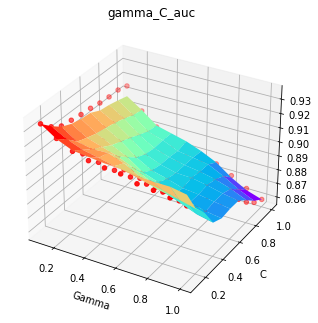

最佳AUROC为：0.9339
最佳组合index： 0


In [15]:
from mpl_toolkits.mplot3d import Axes3D

X = np.array(C_list).reshape(10,10)
Y = np.array(gamma_list).reshape(10,10)
Z = np.array(auroc_list).reshape(10,10)
 
#绘制三维图形
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.scatter(Y,X,Z,c='r')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('gamma_C_auc')
plt.show()

print("最佳AUROC为：%.4f" % max(auroc_list))
print("最佳组合index：",([*range(0,99)][auroc_list.index(max(auroc_list))]))

In [17]:
"""术中低氧——术前+术中变量"""
# 保守建议
C_list = []
gamma_list = []
auroc_list = []

for C in np.linspace(0.1,1.0,10,endpoint=True):
    for gamma in np.linspace(0.1,1.0,10,endpoint=True):
        SVM_CV = SVC(C=C,kernel='rbf', gamma=gamma, class_weight={0:1,1:weight_a}, probability=True, random_state=42)
        roc_auc = cross_val_score(SVM_CV,x_train_2_standard, y_train_2,cv=10, scoring='roc_auc').mean()
        C_list.append(C)
        gamma_list.append(gamma)
        auroc_list.append(roc_auc)
        
result = {"C":C_list, "gamma":gamma_list, "AUROC":auroc_list}
result = pd.DataFrame(result)
pd.set_option('display.max_rows', None)
display(result)

,C,gamma,AUROC
0,0.1,0.1,0.936465
1,0.1,0.2,0.928509
2,0.1,0.3,0.922817
3,0.1,0.4,0.916981
4,0.1,0.5,0.908907
5,0.1,0.6,0.905202
6,0.1,0.7,0.900021
7,0.1,0.8,0.898151
8,0.1,0.9,0.894685
9,0.1,1.0,0.888973


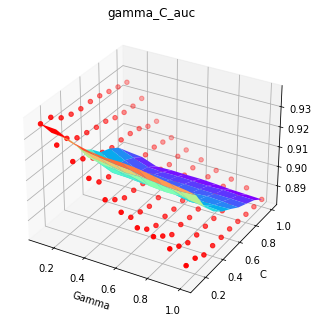

最佳AUROC为：0.9365
最佳组合index： 0


In [18]:
from mpl_toolkits.mplot3d import Axes3D

X = np.array(C_list).reshape(10,10)
Y = np.array(gamma_list).reshape(10,10)
Z = np.array(auroc_list).reshape(10,10)
 
#绘制三维图形
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.scatter(Y,X,Z,c='r')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('gamma_C_auc')
plt.show()

print("最佳AUROC为：%.4f" % max(auroc_list))
print("最佳组合index：",([*range(0,99)][auroc_list.index(max(auroc_list))]))

In [14]:
"""术中低氧——术前+术中变量"""
# 保守建议
C_list = []
gamma_list = []
auroc_list = []

for C in np.linspace(0.1,1.0,10,endpoint=True):
    for gamma in np.linspace(0.1,1.0,10,endpoint=True):
        SVM_CV = SVC(C=C,kernel='rbf', gamma=gamma, class_weight={0:1,1:weight_b}, probability=True, random_state=42)
        roc_auc = cross_val_score(SVM_CV,x_train_3_standard, y_train_3,cv=10, scoring='roc_auc').mean()
        C_list.append(C)
        gamma_list.append(gamma)
        auroc_list.append(roc_auc)
        
result = {"C":C_list, "gamma":gamma_list, "AUROC":auroc_list}
result = pd.DataFrame(result)
pd.set_option('display.max_rows', None)
display(result)

,C,gamma,AUROC
0,0.1,0.1,0.925873
1,0.1,0.2,0.915254
2,0.1,0.3,0.913208
3,0.1,0.4,0.908803
4,0.1,0.5,0.906291
5,0.1,0.6,0.903769
6,0.1,0.7,0.900828
7,0.1,0.8,0.897720
8,0.1,0.9,0.894719
9,0.1,1.0,0.891375


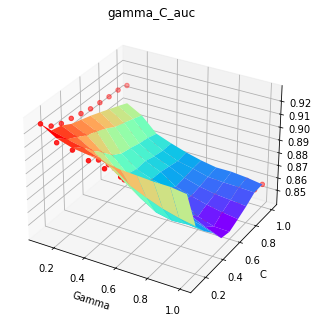

最佳AUROC为：0.9259
最佳组合index： 0


In [15]:
from mpl_toolkits.mplot3d import Axes3D

X = np.array(C_list).reshape(10,10)
Y = np.array(gamma_list).reshape(10,10)
Z = np.array(auroc_list).reshape(10,10)
 
#绘制三维图形
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.scatter(Y,X,Z,c='r')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('gamma_C_auc')
plt.show()

print("最佳AUROC为：%.4f" % max(auroc_list))
print("最佳组合index：",([*range(0,99)][auroc_list.index(max(auroc_list))]))

In [16]:
"""诱导低氧——术前+诱导变量"""
# 保守建议
C_list = []
gamma_list = []
auroc_list = []

for C in np.linspace(0.1,1.0,10,endpoint=True):
    for gamma in np.linspace(0.1,1.0,10,endpoint=True):
        SVM_CV = SVC(C=C,kernel='rbf', gamma=gamma, class_weight={0:1,1:weight_b}, probability=True, random_state=42)
        roc_auc = cross_val_score(SVM_CV,x_train_4_standard, y_train_4,cv=10, scoring='roc_auc').mean()
        C_list.append(C)
        gamma_list.append(gamma)
        auroc_list.append(roc_auc)
        
result = {"C":C_list, "gamma":gamma_list, "AUROC":auroc_list}
result = pd.DataFrame(result)
pd.set_option('display.max_rows', None)
display(result)

,C,gamma,AUROC
0,0.1,0.1,0.934744
1,0.1,0.2,0.928390
2,0.1,0.3,0.924919
3,0.1,0.4,0.920126
4,0.1,0.5,0.914066
5,0.1,0.6,0.907518
6,0.1,0.7,0.902895
7,0.1,0.8,0.898455
8,0.1,0.9,0.893608
9,0.1,1.0,0.889894


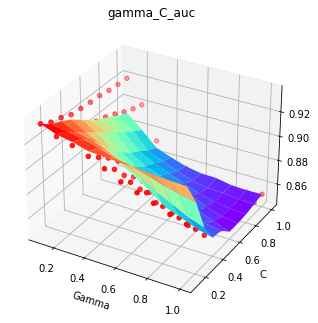

最佳AUROC为：0.9347
最佳组合index： 0


In [17]:
from mpl_toolkits.mplot3d import Axes3D

X = np.array(C_list).reshape(10,10)
Y = np.array(gamma_list).reshape(10,10)
Z = np.array(auroc_list).reshape(10,10)
 
#绘制三维图形
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.scatter(Y,X,Z,c='r')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('gamma_C_auc')
plt.show()

print("最佳AUROC为：%.4f" % max(auroc_list))
print("最佳组合index：",([*range(0,99)][auroc_list.index(max(auroc_list))]))

#### 2. 网格搜索

In [16]:
"""术中低氧——术前变量"""
# 网格搜索
List_SVM = {"C":[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
            "gamma": [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

SVM_S = SVC(kernel='rbf', class_weight={0:1,1:weight_a}, probability=True, random_state=42)

Grid_Search = GridSearchCV(SVM_S, param_grid=List_SVM, scoring = "roc_auc", cv=10)

Grid_Search.fit(x_train_1_standard, y_train_1) 

joblib.dump(Grid_Search, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/Grid Search/Grid_Search_SVM.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search.best_score_))
print('最优“C & gamma”值为:{}'.format(Grid_Search.best_params_))

模型最ROC_AUC:0.938
最优“C & gamma”值为:{'C': 0.02, 'gamma': 0.05}


最佳AUROC为：0.9382
最佳C值： 0.02


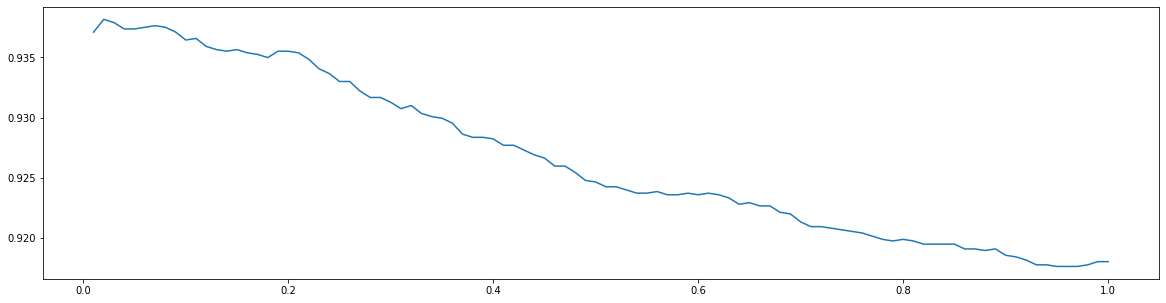

In [17]:
svm_score = []
for i in np.linspace(0.01,1.0,100,endpoint=True):
    SVC_CV = SVC(C=i, kernel='rbf', gamma=0.05, class_weight={0:1,1:weight_a}, probability=True, random_state=42)
    score = cross_val_score(SVC_CV,x_train_1_standard, y_train_1,cv=10, scoring='roc_auc').mean()
    svm_score.append(score)

print("最佳AUROC为：%.4f" % max(svm_score))
print("最佳C值：",([*np.linspace(0.01,1.0,100,endpoint=True)][svm_score.index(max(svm_score))]))
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0.01,1.0,100,endpoint=True), svm_score)
plt.show()

最佳AUROC为：0.9410
最佳gamma值： 0.04


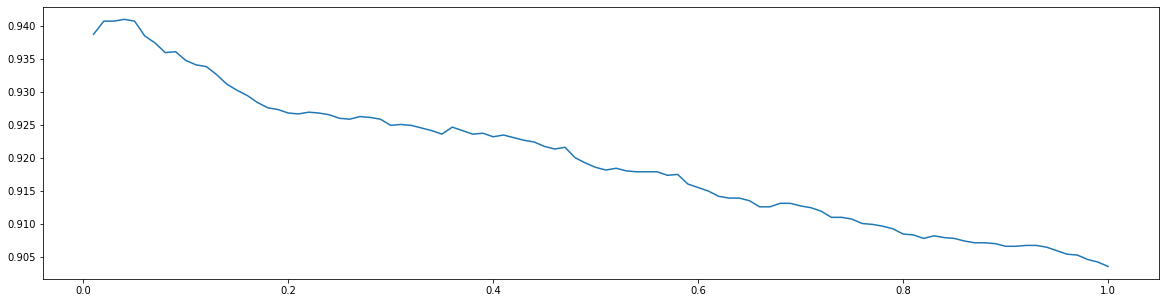

In [21]:
svm_score = []
for i in np.linspace(0.01,1.0,100,endpoint=True):
    SVC_CV = SVC(C=0.05, kernel='rbf', gamma=i, class_weight={0:1,1:weight_a}, probability=True, random_state=42)
    score = cross_val_score(SVC_CV,x_train_1_standard, y_train_1,cv=10, scoring='roc_auc').mean()
    svm_score.append(score)

print("最佳AUROC为：%.4f" % max(svm_score))
print("最佳gamma值：",([*np.linspace(0.01,1.0,100,endpoint=True)][svm_score.index(max(svm_score))]))
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0.01,1.0,100,endpoint=True), svm_score)
plt.show()

In [22]:
"""术中低氧——术前+术中变量"""
# 网格搜索
List_SVM = {"C":[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
            "gamma": [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

SVM_S = SVC(kernel='rbf', class_weight={0:1,1:weight_a}, probability=True, random_state=42)

Grid_Search = GridSearchCV(SVM_S, param_grid=List_SVM, scoring = "roc_auc", cv=10)

Grid_Search.fit(x_train_2_standard, y_train_2) 

joblib.dump(Grid_Search, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/Grid Search/Grid_Search_SVM.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search.best_score_))
print('最优“C & gamma”值为:{}'.format(Grid_Search.best_params_))

模型最ROC_AUC:0.948
最优“C & gamma”值为:{'C': 0.5, 'gamma': 0.005}


最佳AUROC为：0.9484
最佳C值： 0.47000000000000003


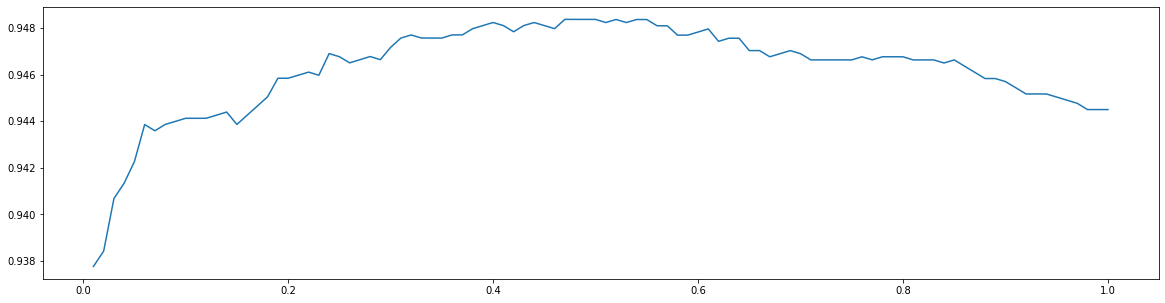

In [23]:
svm_score = []
for i in np.linspace(0.01,1.0,100,endpoint=True):
    SVC_CV = SVC(C=i, kernel='rbf', gamma=0.005, class_weight={0:1,1:weight_a}, probability=True, random_state=42)
    score = cross_val_score(SVC_CV,x_train_2_standard, y_train_2,cv=10, scoring='roc_auc').mean()
    svm_score.append(score)

print("最佳AUROC为：%.4f" % max(svm_score))
print("最佳C值：",([*np.linspace(0.01,1.0,100,endpoint=True)][svm_score.index(max(svm_score))]))
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0.01,1.0,100,endpoint=True), svm_score)
plt.show()

最佳AUROC为：0.9446
最佳gamma值： 0.01


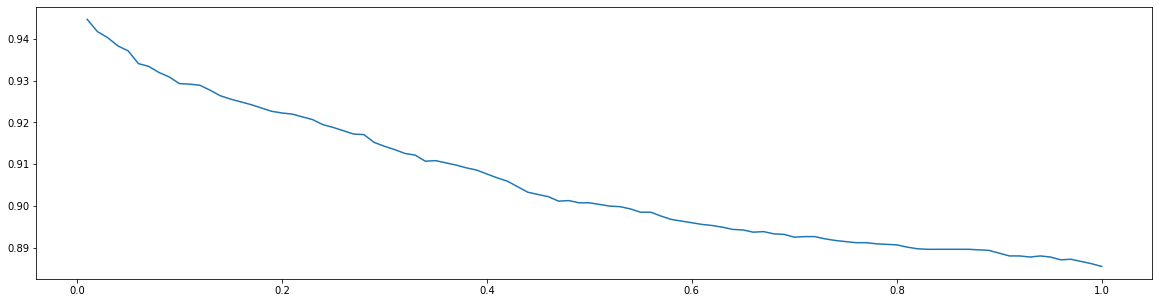

In [24]:
svm_score = []
for i in np.linspace(0.01,1.0,100,endpoint=True):
    SVC_CV = SVC(C=0.5, kernel='rbf', gamma=i, class_weight={0:1,1:weight_a}, probability=True, random_state=42)
    score = cross_val_score(SVC_CV,x_train_2_standard, y_train_2,cv=10, scoring='roc_auc').mean()
    svm_score.append(score)

print("最佳AUROC为：%.4f" % max(svm_score))
print("最佳gamma值：",([*np.linspace(0.01,1.0,100,endpoint=True)][svm_score.index(max(svm_score))]))
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0.01,1.0,100,endpoint=True), svm_score)
plt.show()

In [25]:
"""诱导低氧——术前变量"""
# 网格搜索
List_SVM = {"C":[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
            "gamma": [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

SVM_S = SVC(kernel='rbf', class_weight={0:1,1:weight_b}, probability=True, random_state=42)

Grid_Search = GridSearchCV(SVM_S, param_grid=List_SVM, scoring = "roc_auc", cv=10)

Grid_Search.fit(x_train_3_standard, y_train_3) 

joblib.dump(Grid_Search, "[2]Model_Save/[2]Model/[2]Induction/[1]/Grid Search/Grid_Search_SVM.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search.best_score_))
print('最优“C & gamma”值为:{}'.format(Grid_Search.best_params_))

模型最ROC_AUC:0.934
最优“C & gamma”值为:{'C': 0.07, 'gamma': 0.05}


最佳AUROC为：0.9337
最佳C值： 0.06999999999999999


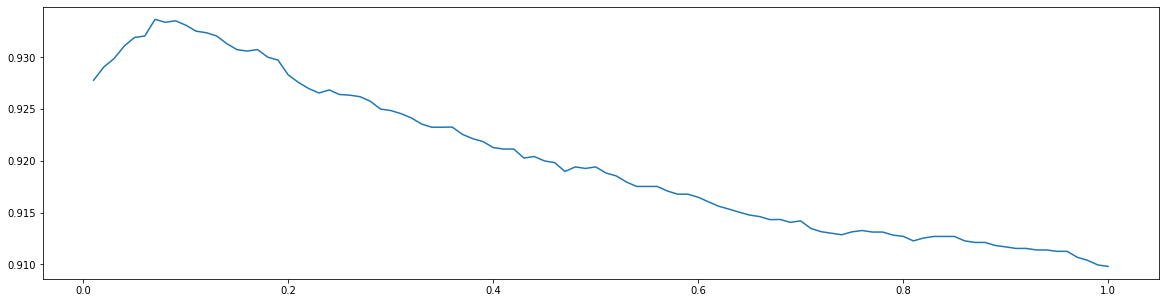

In [26]:
svm_score = []
for i in np.linspace(0.01,1.0,100,endpoint=True):
    SVC_CV = SVC(C=i, kernel='rbf', gamma=0.05, class_weight={0:1,1:weight_b}, probability=True, random_state=42)
    score = cross_val_score(SVC_CV,x_train_3_standard, y_train_3,cv=10, scoring='roc_auc').mean()
    svm_score.append(score)

print("最佳AUROC为：%.4f" % max(svm_score))
print("最佳C值：",([*np.linspace(0.01,1.0,100,endpoint=True)][svm_score.index(max(svm_score))]))
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0.01,1.0,100,endpoint=True), svm_score)
plt.show()

最佳AUROC为：0.9337
最佳gamma值： 0.05


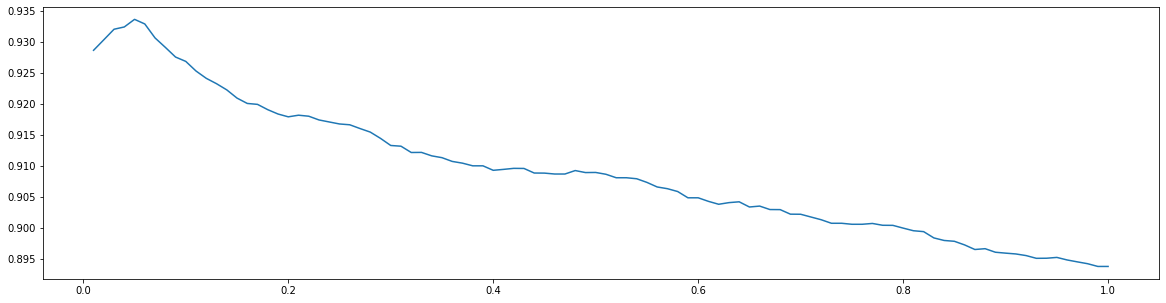

In [27]:
svm_score = []
for i in np.linspace(0.01,1.0,100,endpoint=True):
    SVC_CV = SVC(C=0.07, kernel='rbf', gamma=i, class_weight={0:1,1:weight_b}, probability=True, random_state=42)
    score = cross_val_score(SVC_CV,x_train_3_standard, y_train_3,cv=10, scoring='roc_auc').mean()
    svm_score.append(score)

print("最佳AUROC为：%.4f" % max(svm_score))
print("最佳gamma值：",([*np.linspace(0.01,1.0,100,endpoint=True)][svm_score.index(max(svm_score))]))
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0.01,1.0,100,endpoint=True), svm_score)
plt.show()

In [28]:
"""诱导低氧——术前+术中变量"""
# 网格搜索
List_SVM = {"C":[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
            "gamma": [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

SVM_S = SVC(kernel='rbf', class_weight={0:1,1:weight_b}, probability=True, random_state=42)

Grid_Search = GridSearchCV(SVM_S, param_grid=List_SVM, scoring = "roc_auc", cv=10)

Grid_Search.fit(x_train_4_standard, y_train_4) 

joblib.dump(Grid_Search, "[2]Model_Save/[2]Model/[2]Induction/[2]/Grid Search/Grid_Search_SVM.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search.best_score_))
print('最优“C & gamma”值为:{}'.format(Grid_Search.best_params_))

模型最ROC_AUC:0.944
最优“C & gamma”值为:{'C': 0.4, 'gamma': 0.01}


最佳AUROC为：0.9445
最佳C值： 0.4


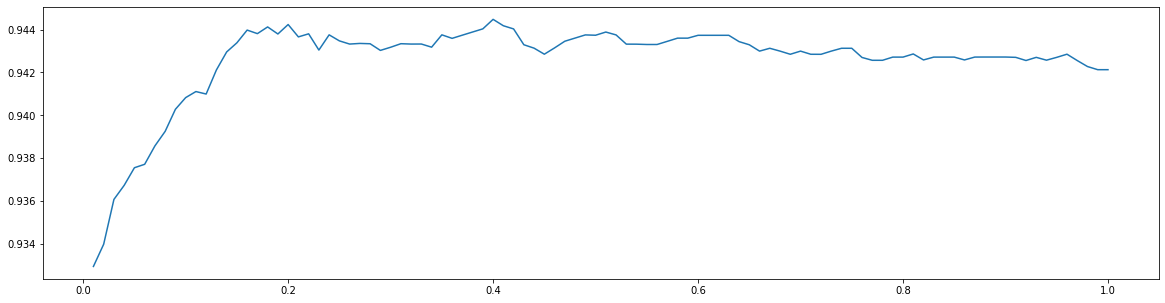

In [29]:
svm_score = []
for i in np.linspace(0.01,1.0,100,endpoint=True):
    SVC_CV = SVC(C=i, kernel='rbf', gamma=0.01, class_weight={0:1,1:weight_b}, probability=True, random_state=42)
    score = cross_val_score(SVC_CV,x_train_4_standard, y_train_4,cv=10, scoring='roc_auc').mean()
    svm_score.append(score)

print("最佳AUROC为：%.4f" % max(svm_score))
print("最佳C值：",([*np.linspace(0.01,1.0,100,endpoint=True)][svm_score.index(max(svm_score))]))
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0.01,1.0,100,endpoint=True), svm_score)
plt.show()

最佳AUROC为：0.9445
最佳gamma值： 0.01


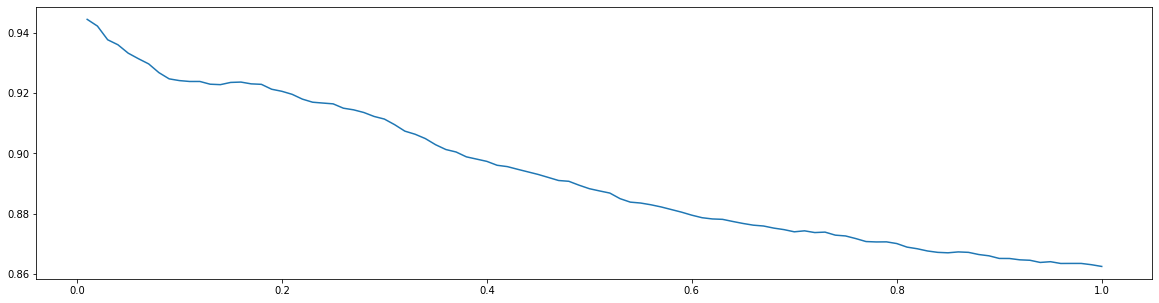

In [30]:
svm_score = []
for i in np.linspace(0.01,1.0,100,endpoint=True):
    SVC_CV = SVC(C=0.4, kernel='rbf', gamma=i, class_weight={0:1,1:weight_b}, probability=True, random_state=42)
    score = cross_val_score(SVC_CV,x_train_4_standard, y_train_4,cv=10, scoring='roc_auc').mean()
    svm_score.append(score)

print("最佳AUROC为：%.4f" % max(svm_score))
print("最佳gamma值：",([*np.linspace(0.01,1.0,100,endpoint=True)][svm_score.index(max(svm_score))]))
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0.01,1.0,100,endpoint=True), svm_score)
plt.show()

#### 3. 交叉验证

In [29]:
# 采用10折交叉验证，验证模型

"""术中低氧——术前变量"""
"""参数列表"""

parameters_1 = {'kernel':'rbf',
                'class_weight':{0:1,1:weight_a},
                'C':0.02,
                'gamma':0.05,
                'probability':True,
                'random_state':42}

# 交叉验证30次
SVM_Verification = SVC(**parameters_1)

k_rf = KFoldValidation(SVM_Verification, x_train_1_standard, y_train_1, k=10)
k_rf.cycle(times=30)

,Cycle Times,训练集准确度,验证集准确度
0,1 st,0.838122,0.830891
1,2 nd,0.837644,0.833006
2,3 rd,0.836446,0.834046
3,4 th,0.836207,0.832994
4,5 th,0.836446,0.830809
5,6 th,0.836207,0.83622
6,7 th,0.836565,0.832994
7,8 th,0.836327,0.837295
8,9 th,0.836806,0.837319
9,10 th,0.836925,0.831919


In [129]:
# 采用10折交叉验证，验证模型

"""术中低氧——术前+术中变量"""
"""参数列表"""

parameters_2 = {'kernel':'rbf',
                'class_weight':{0:1,1:weight_a},
                'C':0.5,
                'gamma':0.005,
                'probability':True,
                'random_state':42}

# 交叉验证30次
SVM_Verification = SVC(**parameters_2)

k_rf = KFoldValidation(SVM_Verification, x_train_2_standard, y_train_2, k=10)
k_rf.cycle(times=30)

,Cycle Times,训练集准确度,验证集准确度
0,1 st,0.875478,0.870687
1,2 nd,0.875118,0.872709
2,3 rd,0.875002,0.87299
3,4 th,0.875358,0.869554
4,5 th,0.87536,0.869612
5,6 th,0.875838,0.877162
6,7 th,0.876437,0.872873
7,8 th,0.87524,0.869659
8,9 th,0.875241,0.873948
9,10 th,0.875119,0.872744


In [145]:
# 采用10折交叉验证，验证模型

"""诱导低氧——术前变量"""
"""参数列表"""

parameters_3 = {'kernel':'rbf',
                'class_weight':{0:1,1:weight_b},
                'C':0.07,
                'gamma':0.05,
                'probability':True,
                'random_state':42}

# 交叉验证30次
SVM_Verification = SVC(**parameters_3)

k_rf = KFoldValidation(SVM_Verification, x_train_3_standard, y_train_3, k=10)
k_rf.cycle(times=30)

,Cycle Times,训练集准确度,验证集准确度
0,1 st,0.834411,0.831884
1,2 nd,0.833813,0.822218
2,3 rd,0.832855,0.827641
3,4 th,0.832256,0.827641
4,5 th,0.833692,0.826554
5,6 th,0.833932,0.831861
6,7 th,0.833694,0.829804
7,8 th,0.832256,0.826519
8,9 th,0.834532,0.833029
9,10 th,0.833213,0.823294


In [176]:
# 采用10折交叉验证，验证模型

"""诱导低氧——术前+诱导变量"""
"""参数列表"""

parameters_4 = {'kernel':'rbf',
                'class_weight':{0:1,1:weight_b},
                'C':0.4,
                'gamma':0.01,
                'probability':True,
                'random_state':42}

# 交叉验证30次
SVM_Verification = SVC(**parameters_4)

k_rf = KFoldValidation(SVM_Verification, x_train_4_standard, y_train_4, k=10)
k_rf.cycle(times=10)

,Cycle Times,训练集准确度,验证集准确度
0,1 st,0.864942,0.859911
1,2 nd,0.865541,0.857691
2,3 rd,0.864464,0.86205
3,4 th,0.864941,0.859829
4,5 th,0.865182,0.857819
5,6 th,0.865542,0.862132
6,7 th,0.865421,0.859946
7,8 th,0.864822,0.86094
8,9 th,0.864464,0.855575
9,10 th,0.864224,0.866316


#### 4. 建模和评估

★ 术中低氧——术前变量 ★

In [32]:
# 利用最佳参数，建立模型
"""最佳参数"""

parameters_1 = {'kernel':'rbf',
                'class_weight':{0:1,1:weight_a},
                'C':0.02,
                'gamma':0.05,
                'probability':True,
                'random_state':42}

SVM = SVC(**parameters_1)

print("开始训练...")
SVM.fit(x_train_1_standard, y_train_1)
joblib.dump(SVM, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/SVM.pkl")
print("训练完毕")

开始训练...
训练完毕


The Optimal Threshold：0.078

AUROC：0.942
95% CI for AUROC： 0.926 - 0.959
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.562
95% CI for AUPRC： 0.458 - 0.660
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.054

Hoslem-Lemeshow Test
HL-chi2：3.904816379428382
df：3.0000
P-value：0.2719

Sensitivity：0.933
Specifity：0.833
+LR：5.587
-LR：0.080
PPV：0.375
NPV：0.991
Accuracy：0.843
Precision：0.375
Recall：0.933
F1-Value：0.535
This confusion matrix is based on the threshold of 0.078



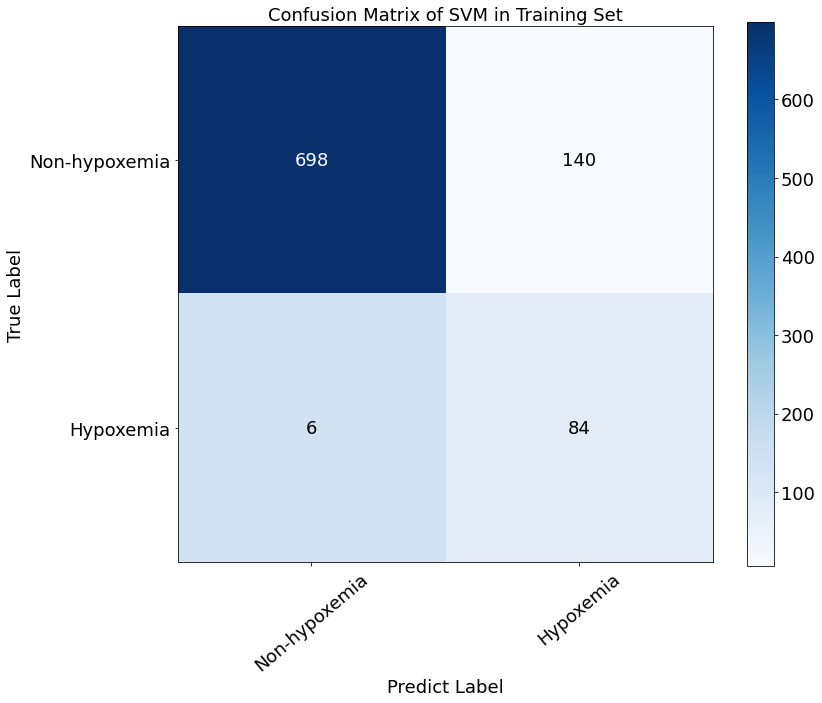

In [33]:
# 用约登指数校准模型的阈值
CM_SVM_train = ConfusionMatrix(SVM, x_train_1_standard, y_train_1, Optimal_Threshold='ROC', HL_test=5)
CM_SVM_train.metrics()
CM_SVM_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Training Set", 
                    reverse=True, Font_color_threshold=300)
CM_SVM_train.plot()

The Threshold：0.078

AUROC：0.934
95% CI for AUROC： 0.899 - 0.969
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.521
95% CI for AUPRC： 0.320 - 0.715
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.059

Hoslem-Lemeshow Test
HL-chi2：1.0533579366264885
df：3.0000
P-value：0.7883

Sensitivity：0.909
Specifity：0.819
+LR：5.024
-LR：0.111
PPV：0.345
NPV：0.989
Accuracy：0.828
Precision：0.345
Recall：0.909
F1-Value：0.500
This confusion matrix is based on the threshold of 0.078



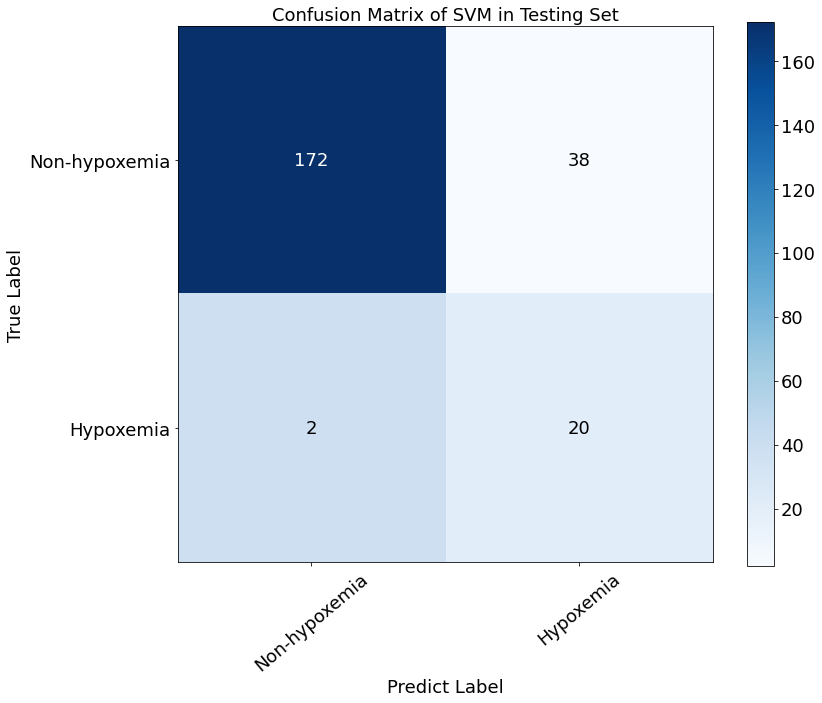

In [34]:
# 在最佳阈值下，定义测试集混淆矩阵
CM_SVM = ConfusionMatrix(SVM, x_test_1_standard, y_test_1, custom_threshold=CM_SVM_train._threshold, HL_test=5)
CM_SVM.metrics()
CM_SVM.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
              reverse=True, Font_color_threshold=100)
CM_SVM.plot()

The Optimal Threshold：0.120

AUROC：0.942
95% CI for AUROC： 0.925 - 0.959
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.559
95% CI for AUPRC： 0.455 - 0.658
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.055

Hoslem-Lemeshow Test
HL-chi2：8.192110848502363
df：3.0000
P-value：0.0422

Sensitivity：0.911
Specifity：0.856
+LR：6.310
-LR：0.104
PPV：0.404
NPV：0.989
Accuracy：0.861
Precision：0.404
Recall：0.911
F1-Value：0.560
This confusion matrix is based on the threshold of 0.120



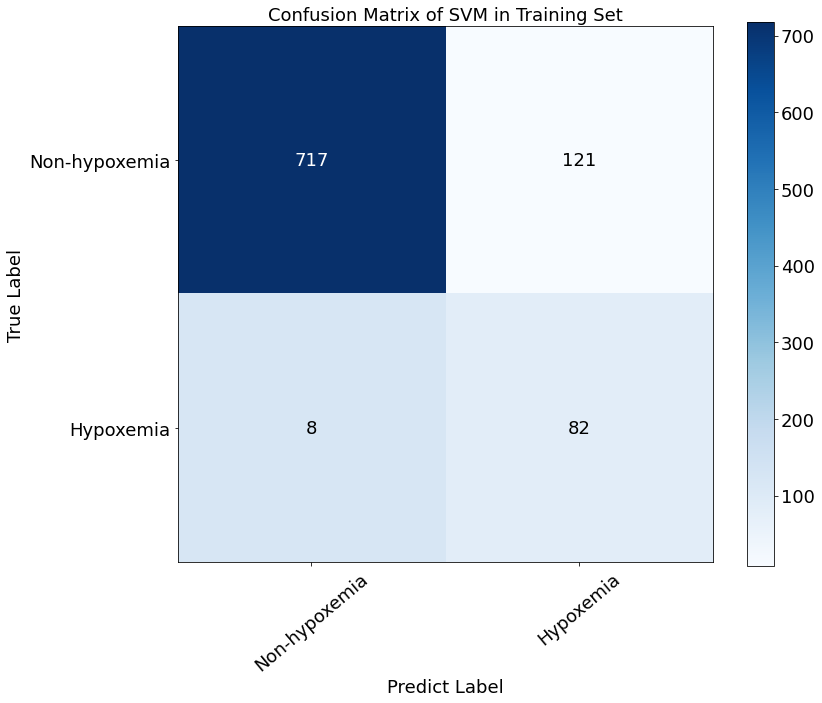

In [37]:
# 尝试校准并评估
SVMC = CalibratedClassifierCV(SVM, cv=10, method='sigmoid')
SVMC.fit(x_train_1_standard, y_train_1)
CM_SVMC_train = ConfusionMatrix(SVMC, x_train_1_standard, y_train_1, Optimal_Threshold='ROC', HL_test=5)
CM_SVMC_train.metrics()
CM_SVMC_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Training Set", 
                     reverse=True, Font_color_threshold=300)
CM_SVMC_train.plot()

The Threshold：0.120

AUROC：0.934
95% CI for AUROC： 0.899 - 0.970
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.524
95% CI for AUPRC： 0.323 - 0.718
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.057

Hoslem-Lemeshow Test
HL-chi2：1.6136939335575187
df：3.0000
P-value：0.6563

Sensitivity：0.909
Specifity：0.833
+LR：5.455
-LR：0.109
PPV：0.364
NPV：0.989
Accuracy：0.841
Precision：0.364
Recall：0.909
F1-Value：0.519
This confusion matrix is based on the threshold of 0.120



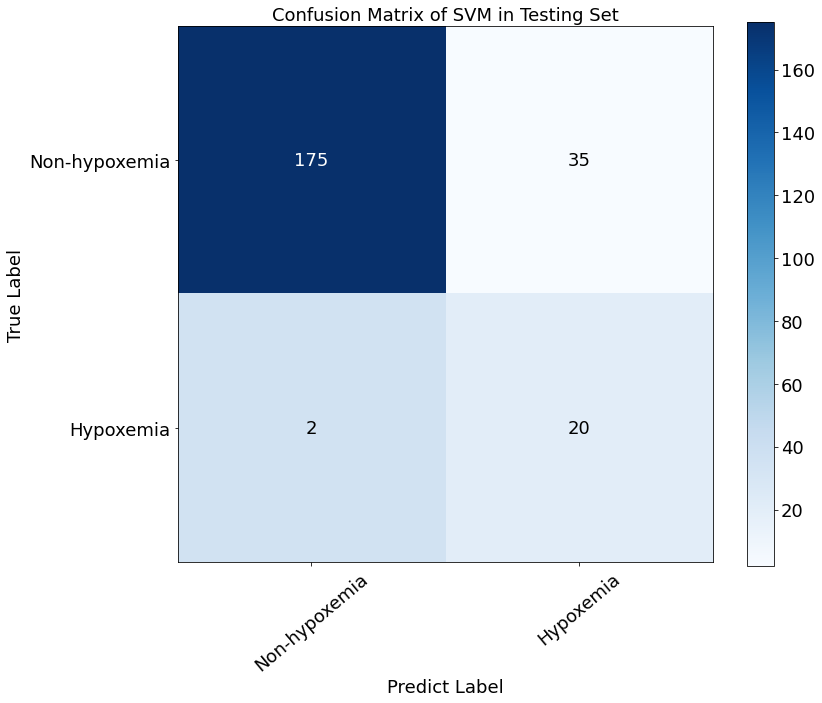

In [38]:
# 校准后，在最佳阈值下，定义测试集混淆矩阵
CM_SVMC = ConfusionMatrix(SVMC, x_test_1_standard, y_test_1, custom_threshold=CM_SVMC_train._threshold, HL_test=5)
CM_SVMC.metrics()
CM_SVMC.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
               reverse=True, Font_color_threshold=100)
CM_SVMC.plot()

In [41]:
# 不是太好,保存未校准的模型
joblib.dump(SVMC, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/SVM_calibration.pkl")
print("训练完毕，模型保存成功：[2]Model_Save/[2]Model/[1]Intraoperative/[1]/SVM_calibration.pkl")

训练完毕，模型保存成功：[2]Model_Save/[2]Model/[1]Intraoperative/[1]/SVM_calibration.pkl


★ 术中低氧——术前+术中变量 ★

In [203]:
# 利用最佳参数，建立模型
"""最佳参数"""

parameters_2 = {'kernel':'rbf',
                'class_weight':{0:1,1:weight_a},
                'C':0.5,
                'gamma':0.005,
                'probability':True,
                'random_state':42}

SVM = SVC(**parameters_2)

print("开始训练...")
SVM.fit(x_train_2_standard, y_train_2)
joblib.dump(SVM, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/SVM.pkl")
print("训练完毕")

开始训练...
训练完毕


The Optimal Threshold：0.105

AUROC：0.954
95% CI for AUROC： 0.940 - 0.969
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.614
95% CI for AUPRC： 0.510 - 0.709
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.050

Hoslem-Lemeshow Test
HL-chi2：3.5952377200727943
df：3.0000
P-value：0.3086

Sensitivity：0.933
Specifity：0.870
+LR：7.176
-LR：0.077
PPV：0.435
NPV：0.992
Accuracy：0.876
Precision：0.435
Recall：0.933
F1-Value：0.594
This confusion matrix is based on the threshold of 0.105



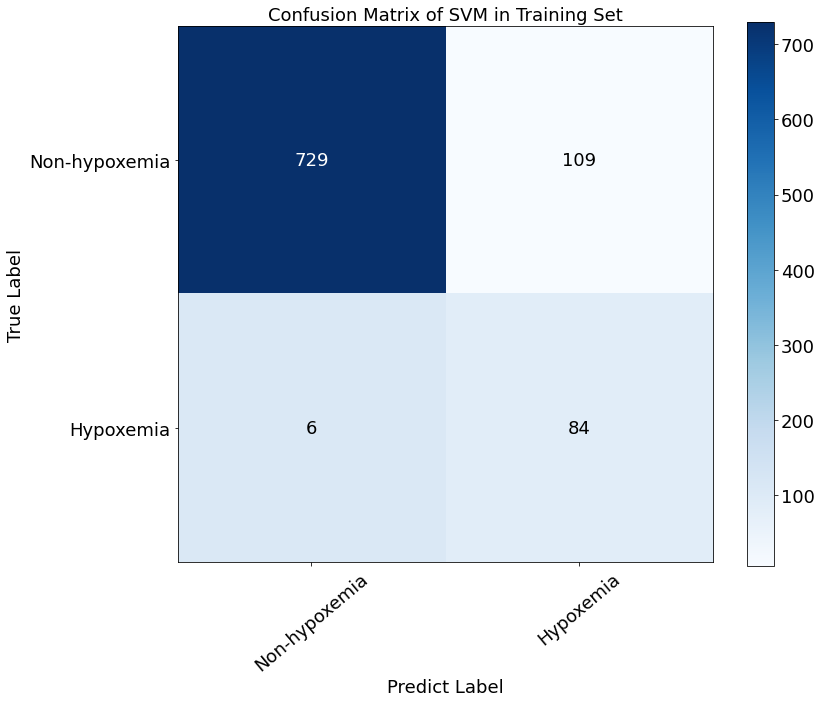

In [204]:
# 用约登指数校准模型的阈值
CM_SVM_train = ConfusionMatrix(SVM, x_train_2_standard, y_train_2, Optimal_Threshold='ROC', HL_test=5)
CM_SVM_train.metrics()
CM_SVM_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Training Set", 
                    reverse=True, Font_color_threshold=300)
CM_SVM_train.plot()

The Threshold：0.105

AUROC：0.952
95% CI for AUROC： 0.924 - 0.979
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.647
95% CI for AUPRC： 0.433 - 0.815
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.052

Hoslem-Lemeshow Test
HL-chi2：1.4184652883890982
df：3.0000
P-value：0.7012

Sensitivity：0.955
Specifity：0.876
+LR：7.710
-LR：0.052
PPV：0.447
NPV：0.995
Accuracy：0.884
Precision：0.447
Recall：0.955
F1-Value：0.609
This confusion matrix is based on the threshold of 0.105



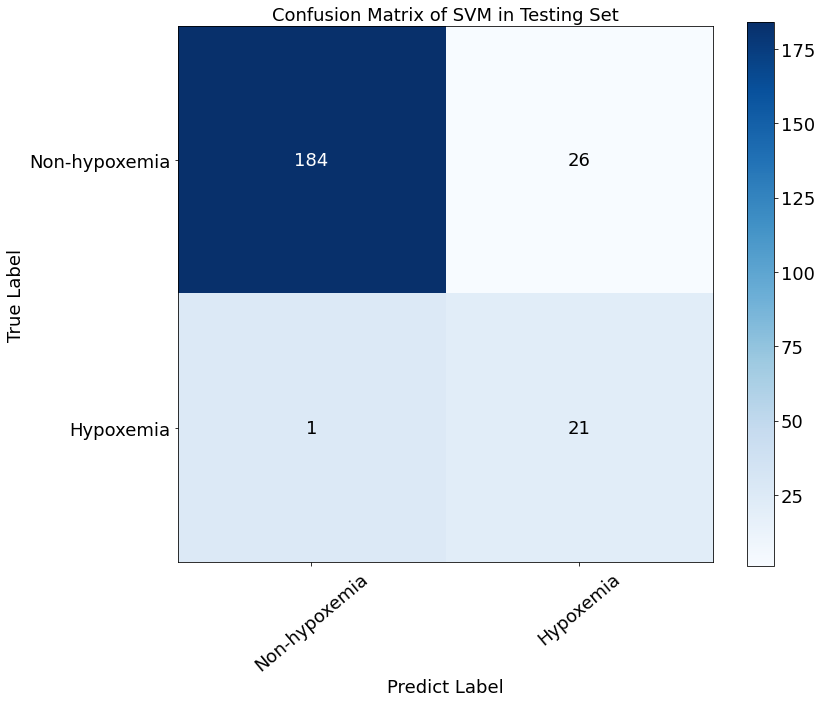

In [205]:
# 在最佳阈值下，定义测试集混淆矩阵
CM_SVM = ConfusionMatrix(SVM, x_test_2_standard, y_test_2, custom_threshold=CM_SVM_train._threshold, HL_test=5)
CM_SVM.metrics()
CM_SVM.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
              reverse=True, Font_color_threshold=100)
CM_SVM.plot()

The Optimal Threshold：0.129

AUROC：0.954
95% CI for AUROC： 0.940 - 0.968
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.611
95% CI for AUPRC： 0.507 - 0.706
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.051

Hoslem-Lemeshow Test
HL-chi2：10.966615967439273
df：3.0000
P-value：0.0119

Sensitivity：0.933
Specifity：0.872
+LR：7.310
-LR：0.076
PPV：0.440
NPV：0.992
Accuracy：0.878
Precision：0.440
Recall：0.933
F1-Value：0.598
This confusion matrix is based on the threshold of 0.129



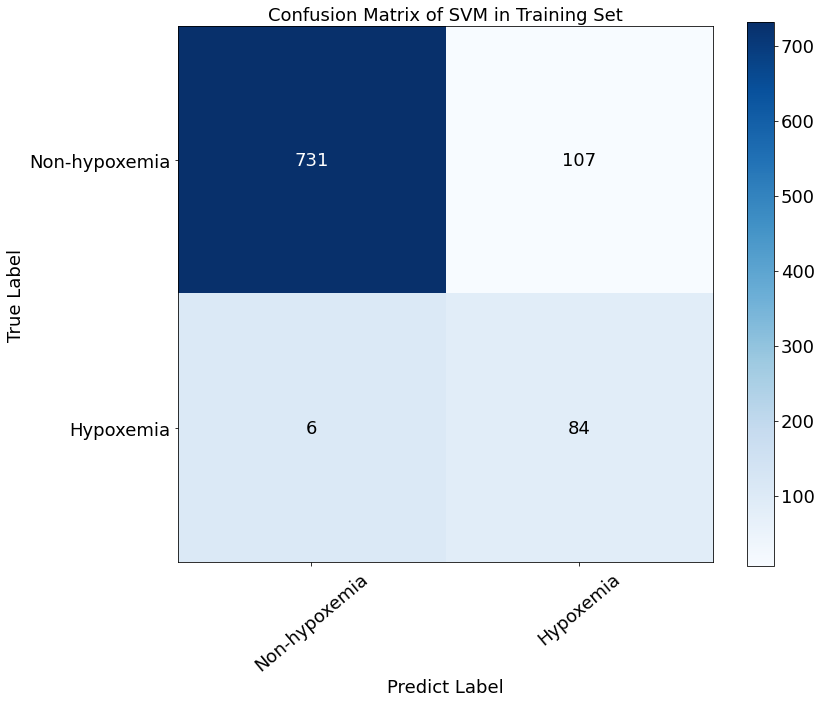

In [208]:
# 尝试校准并评估
SVMC = CalibratedClassifierCV(SVM, cv=10, method='sigmoid')
SVMC.fit(x_train_2_standard, y_train_2)
CM_SVMC_train = ConfusionMatrix(SVMC, x_train_2_standard, y_train_2, Optimal_Threshold='ROC', HL_test=5)
CM_SVMC_train.metrics()
CM_SVMC_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Training Set", 
                     reverse=True, Font_color_threshold=300)
CM_SVMC_train.plot()

The Threshold：0.129

AUROC：0.952
95% CI for AUROC： 0.924 - 0.979
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.650
95% CI for AUPRC： 0.436 - 0.817
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.051

Hoslem-Lemeshow Test
HL-chi2：3.371150835291354
df：3.0000
P-value：0.3379

Sensitivity：0.955
Specifity：0.876
+LR：7.710
-LR：0.052
PPV：0.447
NPV：0.995
Accuracy：0.884
Precision：0.447
Recall：0.955
F1-Value：0.609
This confusion matrix is based on the threshold of 0.129



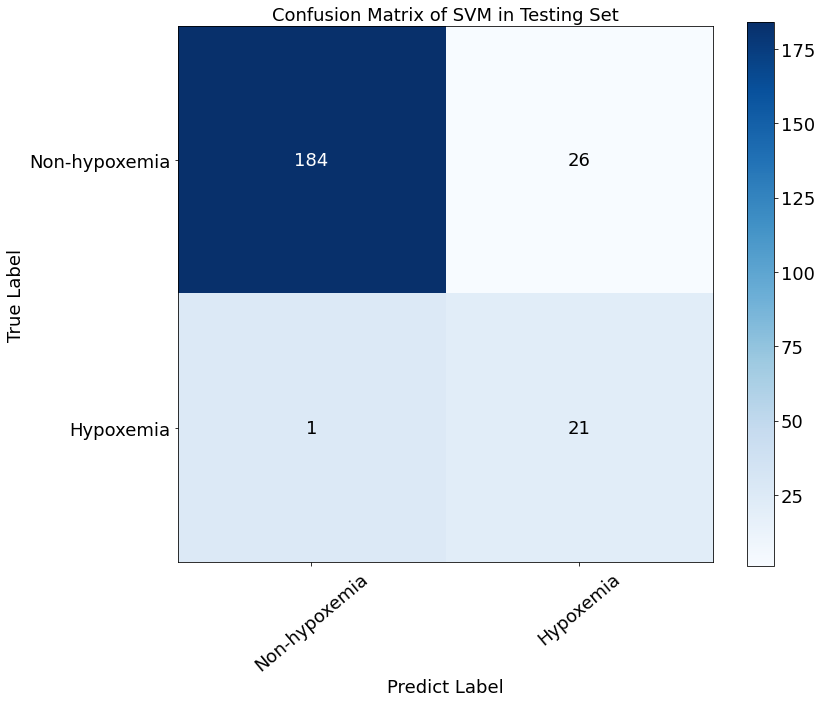

In [209]:
# 校准后，在最佳阈值下，定义测试集混淆矩阵
CM_SVMC = ConfusionMatrix(SVMC, x_test_2_standard, y_test_2, custom_threshold=CM_SVMC_train._threshold, HL_test=5)
CM_SVMC.metrics()
CM_SVMC.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
               reverse=True, Font_color_threshold=100)
CM_SVMC.plot()

In [212]:
# 不是太好,保存未校准的模型
joblib.dump(SVMC, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/SVM_calibration.pkl")
print("训练完毕，模型保存成功：[2]Model_Save/[2]Model/[2]Intraoperative/[2]/SVM_calibration.pkl")

训练完毕，模型保存成功：[2]Model_Save/[2]Model/[2]Intraoperative/[2]/SVM_calibration.pkl


★ 诱导低氧——术前变量 ★

In [193]:
# 利用最佳参数，建立模型
"""最佳参数"""

parameters_3 = {'kernel':'rbf',
                'class_weight':{0:1,1:weight_b},
                'C':0.07,
                'gamma':0.05,
                'probability':True,
                'random_state':42}

SVM = SVC(**parameters_3)

print("开始训练...")
SVM.fit(x_train_3_standard, y_train_3)
joblib.dump(SVM, "[2]Model_Save/[2]Model/[2]Induction/[1]/SVM.pkl")
print("训练完毕")

开始训练...
训练完毕


The Optimal Threshold：0.116

AUROC：0.941
95% CI for AUROC： 0.924 - 0.958
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.527
95% CI for AUPRC： 0.420 - 0.633
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.052

Hoslem-Lemeshow Test
HL-chi2：3.320558184454324
df：3.0000
P-value：0.3448

Sensitivity：0.902
Specifity：0.856
+LR：6.258
-LR：0.114
PPV：0.378
NPV：0.989
Accuracy：0.860
Precision：0.378
Recall：0.902
F1-Value：0.532
This confusion matrix is based on the threshold of 0.116



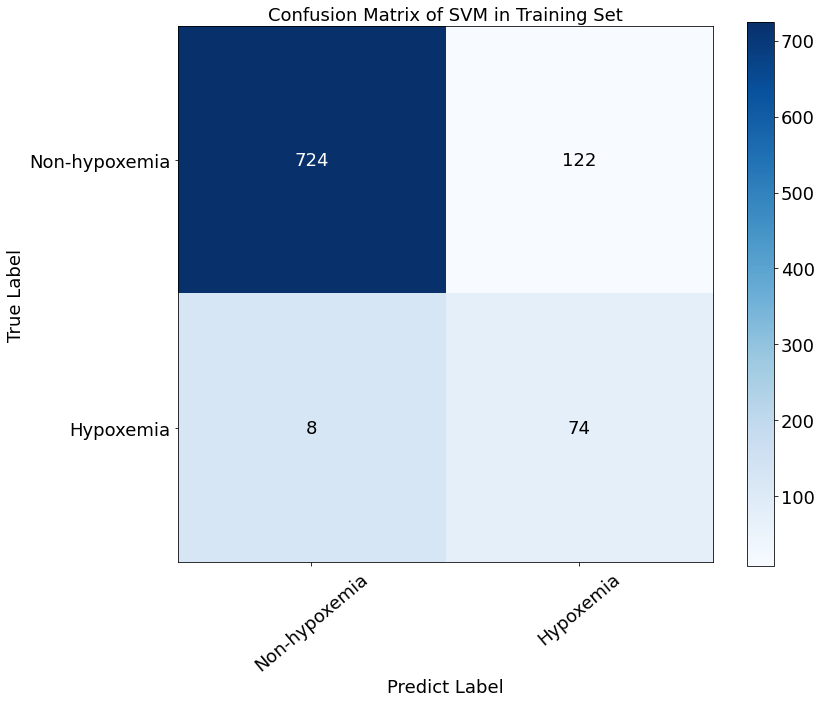

In [194]:
# 用约登指数校准模型的阈值
CM_SVM_train = ConfusionMatrix(SVM, x_train_3_standard, y_train_3, Optimal_Threshold='ROC', HL_test=5)
CM_SVM_train.metrics()
CM_SVM_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Training Set", 
                    reverse=True, Font_color_threshold=300)
CM_SVM_train.plot()

The Threshold：0.116

AUROC：0.927
95% CI for AUROC： 0.889 - 0.965
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.417
95% CI for AUPRC： 0.227 - 0.635
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.057

Hoslem-Lemeshow Test
HL-chi2：0.9754829110090051
df：3.0000
P-value：0.8072

Sensitivity：0.900
Specifity：0.844
+LR：5.782
-LR：0.118
PPV：0.353
NPV：0.989
Accuracy：0.849
Precision：0.353
Recall：0.900
F1-Value：0.507
This confusion matrix is based on the threshold of 0.116



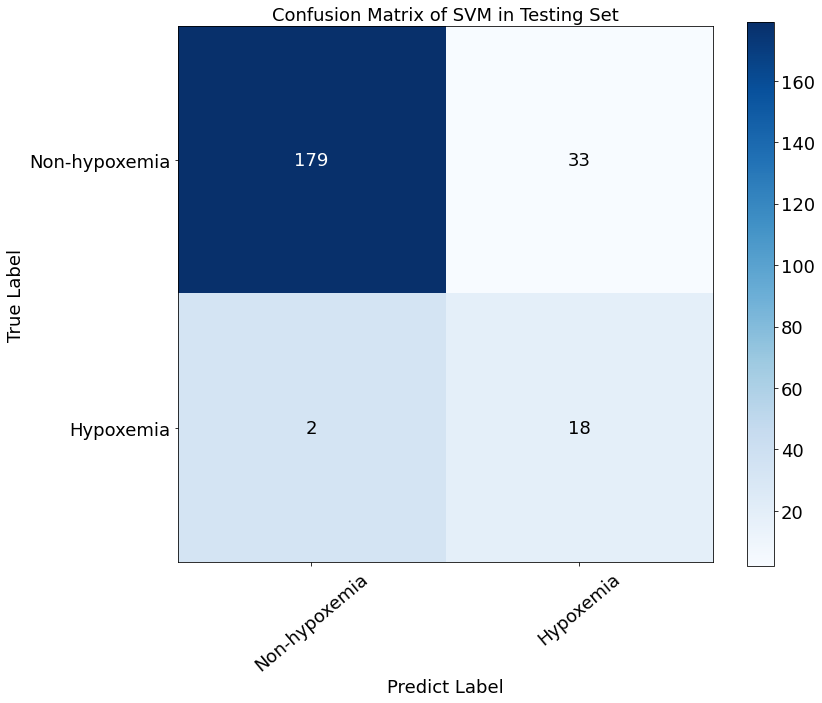

In [195]:
# 在最佳阈值下，定义测试集混淆矩阵
CM_SVM = ConfusionMatrix(SVM, x_test_3_standard, y_test_3, custom_threshold=CM_SVM_train._threshold, HL_test=5)
CM_SVM.metrics()
CM_SVM.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
              reverse=True, Font_color_threshold=100)
CM_SVM.plot()

The Optimal Threshold：0.132

AUROC：0.941
95% CI for AUROC： 0.923 - 0.958
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.521
95% CI for AUPRC： 0.413 - 0.626
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.053

Hoslem-Lemeshow Test
HL-chi2：9.148745311932682
df：3.0000
P-value：0.0274

Sensitivity：0.902
Specifity：0.856
+LR：6.258
-LR：0.114
PPV：0.378
NPV：0.989
Accuracy：0.860
Precision：0.378
Recall：0.902
F1-Value：0.532
This confusion matrix is based on the threshold of 0.132



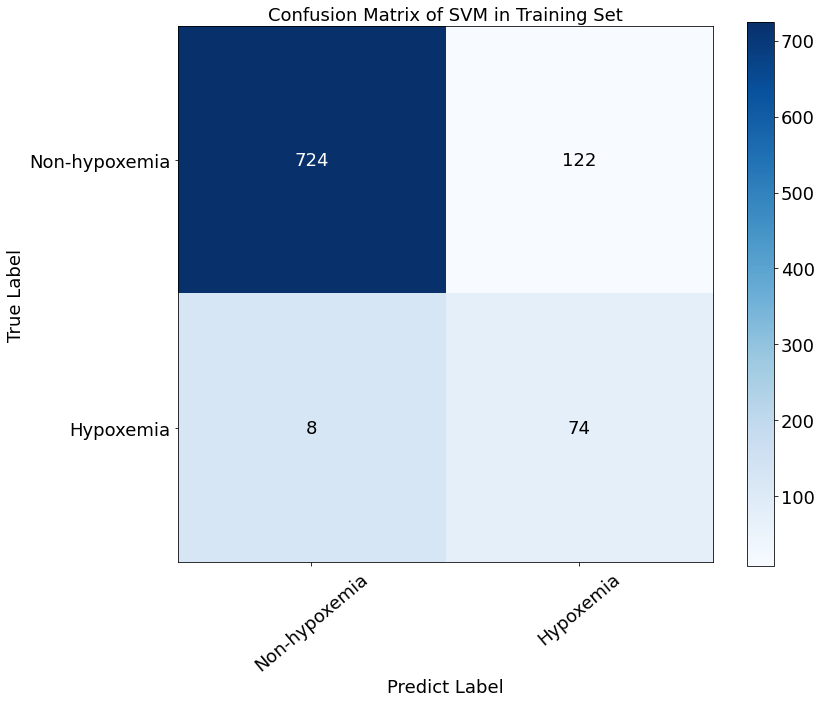

In [198]:
# 尝试校准并评估
SVMC = CalibratedClassifierCV(SVM, cv=10, method='sigmoid')
SVMC.fit(x_train_3_standard, y_train_3)
CM_SVMC_train = ConfusionMatrix(SVMC, x_train_3_standard, y_train_3, Optimal_Threshold='ROC', HL_test=5)
CM_SVMC_train.metrics()
CM_SVMC_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Training Set", 
                     reverse=True, Font_color_threshold=300)
CM_SVMC_train.plot()

The Threshold：0.132

AUROC：0.928
95% CI for AUROC： 0.890 - 0.965
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.421
95% CI for AUPRC： 0.230 - 0.639
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.056

Hoslem-Lemeshow Test
HL-chi2：1.573070143825433
df：3.0000
P-value：0.6655

Sensitivity：0.900
Specifity：0.840
+LR：5.612
-LR：0.119
PPV：0.346
NPV：0.989
Accuracy：0.845
Precision：0.346
Recall：0.900
F1-Value：0.500
This confusion matrix is based on the threshold of 0.132



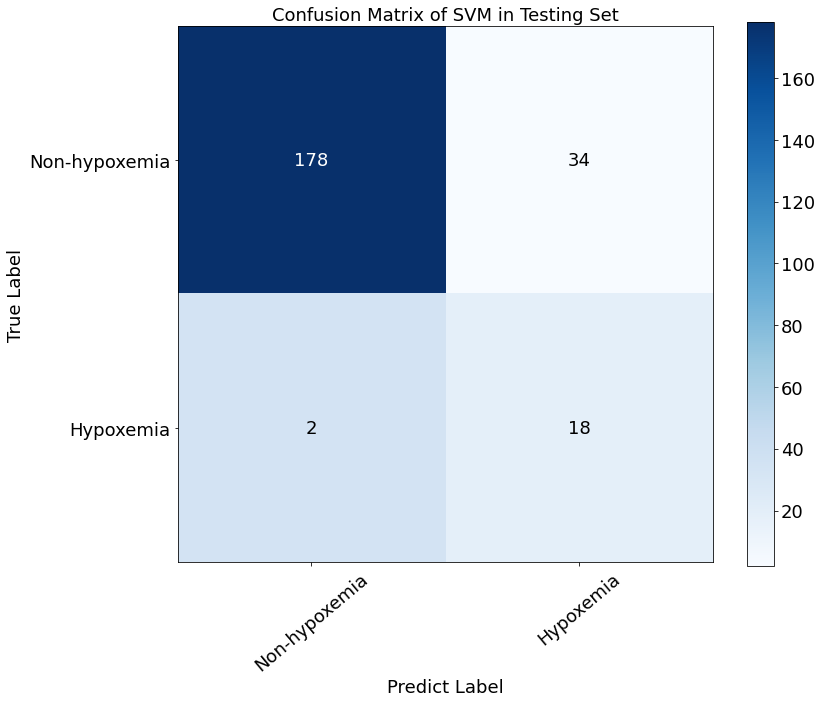

In [199]:
# 校准后，在最佳阈值下，定义测试集混淆矩阵
CM_SVMC = ConfusionMatrix(SVMC, x_test_3_standard, y_test_3, custom_threshold=CM_SVMC_train._threshold, HL_test=5)
CM_SVMC.metrics()
CM_SVMC.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
               reverse=True, Font_color_threshold=100)
CM_SVMC.plot()

In [202]:
# 不是太好,保存未校准的模型
joblib.dump(SVMC, "[2]Model_Save/[2]Model/[2]Induction/[1]/SVM_calibration.pkl")
print("训练完毕，模型保存成功：[2]Model_Save/[2]Model/[2]Induction/[1]/SVM_calibration.pkl")

训练完毕，模型保存成功：[2]Model_Save/[2]Model/[2]Induction/[1]/SVM_calibration.pkl


★ 诱导低氧——术前+诱导变量 ★

In [179]:
# 利用最佳参数，建立模型
"""最佳参数"""

parameters_4 = {'kernel':'rbf',
                'class_weight':{0:1,1:weight_b},
                'C':0.4,
                'gamma':0.01,
                'probability':True,
                'random_state':42}

SVM = SVC(**parameters_4)

print("开始训练...")
SVM.fit(x_train_4_standard, y_train_4)
joblib.dump(SVM, "[2]Model_Save/[2]Model/[2]Induction/[2]/SVM.pkl")
print("训练完毕")

开始训练...
训练完毕


The Optimal Threshold：0.077

AUROC：0.948
95% CI for AUROC： 0.932 - 0.963
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.558
95% CI for AUPRC： 0.450 - 0.661
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.050

Hoslem-Lemeshow Test
HL-chi2：3.9501612465942832
df：3.0000
P-value：0.2669

Sensitivity：0.951
Specifity：0.844
+LR：6.096
-LR：0.058
PPV：0.371
NPV：0.994
Accuracy：0.853
Precision：0.371
Recall：0.951
F1-Value：0.534
This confusion matrix is based on the threshold of 0.077



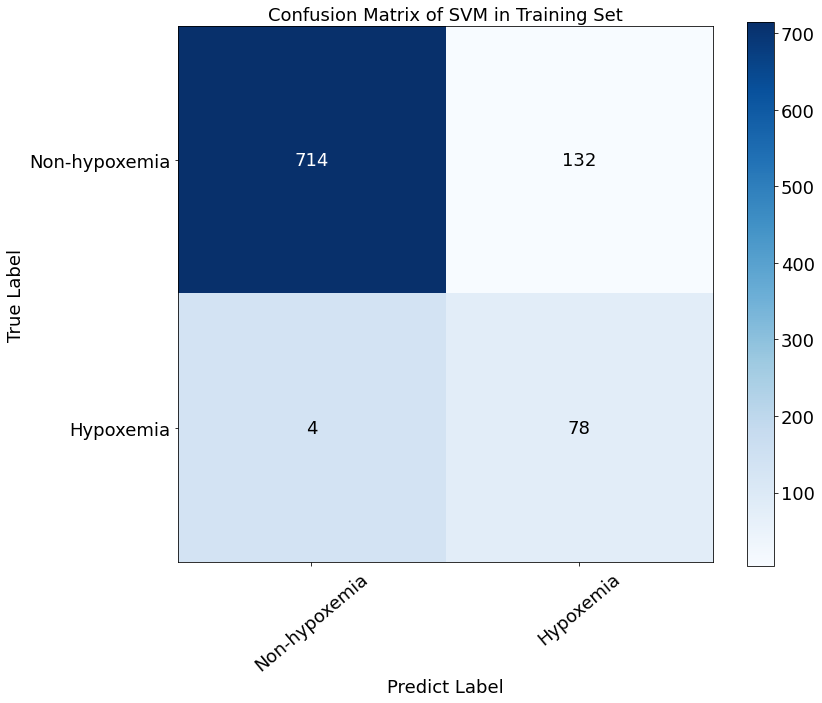

In [180]:
# 用约登指数校准模型的阈值
CM_SVM_train = ConfusionMatrix(SVM, x_train_4_standard, y_train_4, Optimal_Threshold='ROC', HL_test=5)
CM_SVM_train.metrics()
CM_SVM_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Training Set", 
                    reverse=True, Font_color_threshold=300)
CM_SVM_train.plot()

The Threshold：0.077

AUROC：0.949
95% CI for AUROC： 0.918 - 0.979
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.595
95% CI for AUPRC： 0.375 - 0.782
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.051

Hoslem-Lemeshow Test
HL-chi2：1.4585572458586429
df：3.0000
P-value：0.6919

Sensitivity：0.950
Specifity：0.821
+LR：5.300
-LR：0.061
PPV：0.333
NPV：0.994
Accuracy：0.832
Precision：0.333
Recall：0.950
F1-Value：0.494
This confusion matrix is based on the threshold of 0.077



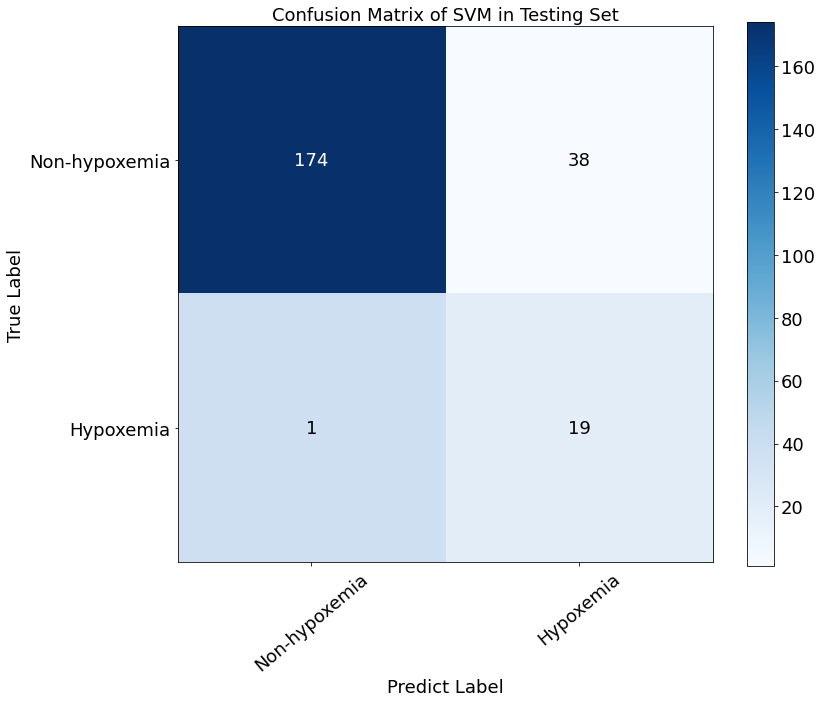

In [181]:
# 在最佳阈值下，定义测试集混淆矩阵
CM_SVM = ConfusionMatrix(SVM, x_test_4_standard, y_test_4, custom_threshold=CM_SVM_train._threshold, HL_test=5)
CM_SVM.metrics()
CM_SVM.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
              reverse=True, Font_color_threshold=100)
CM_SVM.plot()

The Optimal Threshold：0.099

AUROC：0.947
95% CI for AUROC： 0.932 - 0.963
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.558
95% CI for AUPRC： 0.449 - 0.661
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.051

Hoslem-Lemeshow Test
HL-chi2：10.373496376855464
df：3.0000
P-value：0.0156

Sensitivity：0.951
Specifity：0.844
+LR：6.096
-LR：0.058
PPV：0.371
NPV：0.994
Accuracy：0.853
Precision：0.371
Recall：0.951
F1-Value：0.534
This confusion matrix is based on the threshold of 0.099



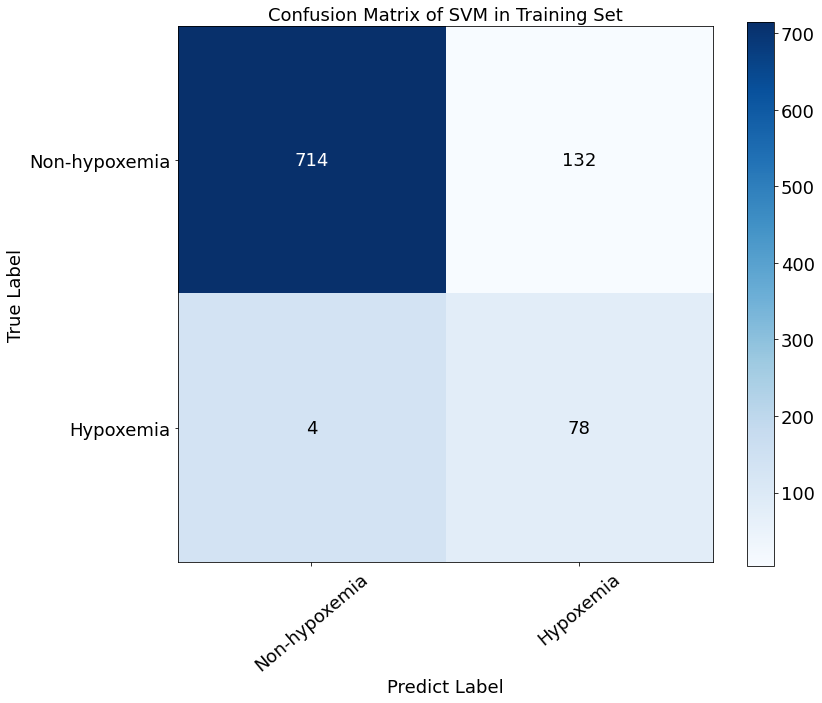

In [184]:
# 尝试校准并评估
SVMC = CalibratedClassifierCV(SVM, cv=10, method='sigmoid')
SVMC.fit(x_train_4_standard, y_train_4)
CM_SVMC_train = ConfusionMatrix(SVMC, x_train_4_standard, y_train_4, Optimal_Threshold='ROC', HL_test=5)
CM_SVMC_train.metrics()
CM_SVMC_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Training Set", 
                     reverse=True, Font_color_threshold=300)
CM_SVMC_train.plot()

The Threshold：0.099

AUROC：0.948
95% CI for AUROC： 0.918 - 0.979
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.594
95% CI for AUPRC： 0.374 - 0.781
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.051

Hoslem-Lemeshow Test
HL-chi2：3.3698963831512145
df：3.0000
P-value：0.3380

Sensitivity：0.950
Specifity：0.821
+LR：5.300
-LR：0.061
PPV：0.333
NPV：0.994
Accuracy：0.832
Precision：0.333
Recall：0.950
F1-Value：0.494
This confusion matrix is based on the threshold of 0.099



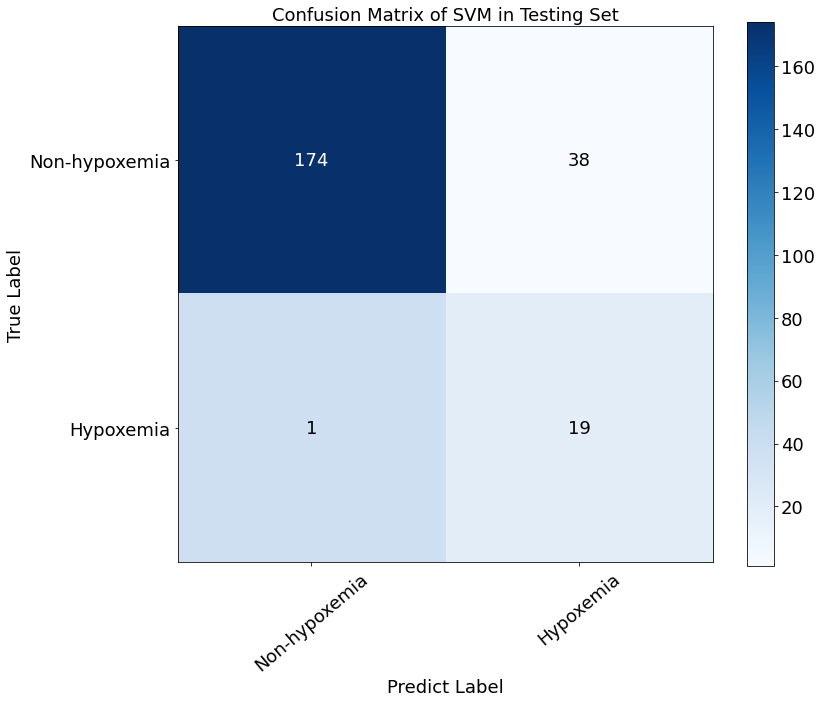

In [185]:
# 校准后，在最佳阈值下，定义测试集混淆矩阵
CM_SVMC = ConfusionMatrix(SVMC, x_test_4_standard, y_test_4, custom_threshold=CM_SVMC_train._threshold, HL_test=5)
CM_SVMC.metrics()
CM_SVMC.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of SVM in Testing Set", 
               reverse=True, Font_color_threshold=100)
CM_SVMC.plot()

In [192]:
# 不是太好,保存未校准的模型
joblib.dump(SVMC, "[2]Model_Save/[2]Model/[2]Induction/[2]/SVM_calibration.pkl")
print("训练完毕，模型保存成功：[2]Model_Save/[2]Model/[2]Induction/[2]/SVM_calibration.pkl")

训练完毕，模型保存成功：[2]Model_Save/[2]Model/[2]Induction/[2]/SVM_calibration.pkl


# ---End---